In [1]:
#code section for data cleaning
import pandas as pd #importing necessary libraries
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
df=pd.read_csv("C:\\dataMining\\11.28_Reliability_safety_and_punctuality_of_services_of_individual_Public_1970_71.csv") #reading necessary csv files
df=df.replace(to_replace ="@",value ="NaN") #setting non numerical values to NaN
df=df.replace(to_replace ="*",value ="NaN")
df1=df[['Lack of Punctuality - % of dalayed trips to total sch. Trips (Col. 13)','Lack of Punctuality - % of missed to total Sch. Trips (Col. 14)']] #creating a new data frame with values of col.13,col.14
df2=df[['Items (Col. 1)','Category (Col. 2)','Sub-category (Col. 3)','Type of Service/Undertaking (Col. 4)']] #creating a new data frame with values of col.1,col.2,col.3,col.4
df=df[['Break-downs - Total No. (Col. 5)','Break-downs - Per vehicle Operated (Col. 6)','Break-downs - Per 10000 Vehicle Kms. (Col. 7)','Accidents - Total No. (Col. 8)','Accidents - Per Vehicle Operated (Col. 9)','Accidents - Per 10000 Vehicle (Col. 10)','Dead Kms. - Total (000) (Col. 11)','Dead Kms. - Per vehicle Operated (Col. 12)']].dropna(thresh=len(df)-6,axis=1) #dropping all columns with excess of NaN values
df=df.join(df1) #joining the earlier broken down dataframes
df=df2.join(df)
df=df.dropna(axis=0, how='any', thresh=11, subset=None, inplace=False) # dropping rows with excess of NaN rows
df=df.fillna(df.median(),inplace=False) #replacing remaining NaN values with suitable measure of central tendencies(median)
del df['Break-downs - Per vehicle Operated (Col. 6)'] #deleting redundant rows
del df['Accidents - Per Vehicle Operated (Col. 9)']
df

,Items (Col. 1),Category (Col. 2),Sub-category (Col. 3),Type of Service/Undertaking (Col. 4),Break-downs - Total No. (Col. 5),Break-downs - Per 10000 Vehicle Kms. (Col. 7),Accidents - Total No. (Col. 8),Accidents - Per 10000 Vehicle (Col. 10),Dead Kms. - Total (000) (Col. 11),Dead Kms. - Per vehicle Operated (Col. 12),Lack of Punctuality - % of dalayed trips to total sch. Trips (Col. 13),Lack of Punctuality - % of missed to total Sch. Trips (Col. 14)
0,A. Passenger Transport,1. City Services,1. City Services,"APSRTC, Hyderabad",5020.0,2.14,199.0,0.08,724.0,2.07,3.68,7.99
1,A. Passenger Transport,1. City Services,1. City Services,"AMTS, Ahmedabad",26348.0,9.13,1237.0,0.43,1208.0,2.77,3.68,3.60
2,A. Passenger Transport,1. City Services,1. City Services,"J&KGTU, Srinagar*",21941.0,8.32,1279.0,0.48,65.0,1.55,1.00,2.12
3,A. Passenger Transport,1. City Services,1. City Services,"KSRTC, Trivandrum",1871.0,2.13,160.0,0.02,200.0,1.12,8.97,11.33
4,A. Passenger Transport,1. City Services,1. City Services,"TSTD, Madras",104848.0,6.64,4095.0,0.26,564.0,0.33,1.30,4.70
5,A. Passenger Transport,1. City Services,1. City Services,"BESTU, Bombay",46019.0,4.99,11257.0,1.22,1908.0,1.69,3.38,5.80
6,A. Passenger Transport,1. City Services,1. City Services,"PMTS, Poona",4060.0,2.36,532.0,0.30,442.0,1.70,3.68,2.60
7,A. Passenger Transport,1. City Services,1. City Services,"MySRTC, Bangalore",8972.0,4.05,299.0,0.14,1304.0,3.90,3.68,11.53
8,A. Passenger Transport,1. City Services,1. City Services,"UPGR, Lucknow",620.0,0.38,161.0,0.10,838.0,2.87,4.20,17.50
9,A. Passenger Transport,1. City Services,1. City Services,"CSTC, Calcutta",91634.0,35.28,499.0,0.19,2005.0,4.33,17.92,17.20


In [2]:
#code section for merging columns(attributes)
atot1=df['Break-downs - Total No. (Col. 5)'].iloc[0:12].sum()
atot2=df['Break-downs - Total No. (Col. 5)'].iloc[12:30].sum()
atot3=df['Break-downs - Total No. (Col. 5)'].iloc[30:35].sum()
atot4=df['Break-downs - Total No. (Col. 5)'].iloc[35:41].sum()
atot5=df['Break-downs - Total No. (Col. 5)'].iloc[41:44].sum()
btot1=df['Accidents - Total No. (Col. 8)'].iloc[0:12].sum()
btot2=df['Accidents - Total No. (Col. 8)'].iloc[12:30].sum()
btot3=df['Accidents - Total No. (Col. 8)'].iloc[30:35].sum()
btot4=df['Accidents - Total No. (Col. 8)'].iloc[35:41].sum()
btot5=df['Accidents - Total No. (Col. 8)'].iloc[41:44].sum()
data={
    'Sub-category Service-wise':["City Services","District-Plain Services","District-Hill Services","Goods Services	","Taxi Services"],    
    'Total no. of breakdowns Service-wise':[atot1,atot2,atot3,atot4,atot5],
    'Total no. of accidents Service-wise':[btot1,btot2,btot3,btot4,btot5]
} #entering newly merged values to new columns reducing no. of redundant columns
dtf=pd.DataFrame(data,columns=["Sub-category Service-wise","Total no. of breakdowns Service-wise","Total no. of accidents Service-wise"])
dtf.set_index("Sub-category Service-wise",inplace=True) #setting index to Sub-category Service-wise for creating dataframe
dtf

,Total no. of breakdowns Service-wise,Total no. of accidents Service-wise
Sub-category Service-wise,,
City Services,399166.0,20762.0
District-Plain Services,119793.0,8854.0
District-Hill Services,2509.0,131.0
Goods Services\t,1839.0,117.0
Taxi Services,23.0,13.0


In [4]:
# K-Means Clustering starts
#storing the no. of breakdown and accidents
x=[]
y=[]
for i in range(0,44):
    x.append(df['Break-downs - Total No. (Col. 5)'].iloc[i])
    y.append(df['Accidents - Total No. (Col. 8)'].iloc[i])

In [5]:
#storing indices for making combinations
ind=[]
for i in range(0,44):
    ind.append(i)

In [6]:
#calculating minimum sse for each number of clusters
#This may take some time
elb=[]
numclus=[]
for numofclus in range(1,5):
    comb=sum([list(map(list, combinations(ind, i))) for i in range(numofclus,numofclus+1)], [])
    minsse=1000000000000
    for j in range(1,len(comb)):
        cenx=[]
        ceny=[]
        for k in range(0,len(comb[j])):
            cenx.append(x[comb[j][k]])
            ceny.append(y[comb[j][k]])
        totsse=0
        for k in range(0,len(x)):
            mindis=1000000000000
            for l in range(0,len(cenx)):
                dis=(x[k]-cenx[l])*(x[k]-cenx[l]) + (y[k]-ceny[l])*(y[k]-ceny[l])
                if dis<mindis:
                    mindis=dis
            totsse = totsse + mindis
        if totsse<minsse:
            minsse=totsse
    elb.append(minsse)
    numclus.append(numofclus)
elb

[26466092051.0, 4510139055.0, 1335182519.0, 770085640.0]

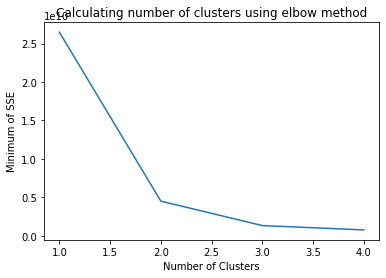

In [7]:
#plotting it in order to calculate the optimum number of clusters via elbow method

plt.plot(numclus, elb) 
  
# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Minimum of SSE') 
  
# giving a title to my graph 
plt.title('Calculating number of clusters using elbow method') 
  
# function to show the plot 
plt.show()

In [8]:
#calculating the clusters with minimum sse for given number of clusters
minnsse=10000000000000
color1=[]
color2=[]
for i in range(0,len(x)):
    color1.append(-1)
    color2.append(-1)
#generating all possible combinations
comb1=sum([list(map(list, combinations(ind, i))) for i in range(3,4)], [])
for rep in range(0,len(comb1),10):
    cenx=[]
    ceny=[]
    #appending corresponding points to indices
    for i in range(0,len(comb1[rep])):
        cenx.append(x[comb1[rep][i]])
        ceny.append(y[comb1[rep][i]])
    #performing k-means clustering
    for i in range(0,100):
        sse=0
        for j in range(0,len(x)):
            minn=10000000000000
            minin=-1
            for k in range(0,3):
                if((x[j]-cenx[k])*(x[j]-cenx[k])+(y[j]-ceny[k])*(y[j]-ceny[k])<minn):
                    minn=(x[j]-cenx[k])*(x[j]-cenx[k])+(y[j]-ceny[k])*(y[j]-ceny[k])
                    minin=k
            color2[j]=minin
            sse=sse+minn
        if(sse<minnsse):
            minnsse=sse
            for j in range(0,44):
                #updating the color in case sse is less
                color1[j]=color2[j]
        for j in range(0,3):
            #calculating new centroids for each cluster
            newx=0
            newy=0
            xno=0
            yno=0
            for k in range(0,len(x)):
                if(color2[k]==j):
                    newx=newx+x[k]
                    newy=newy+y[k]
                    xno=xno+1
                    yno=yno+1
            cenx[j]=newx/xno
            ceny[j]=newy/yno
color1

[0,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

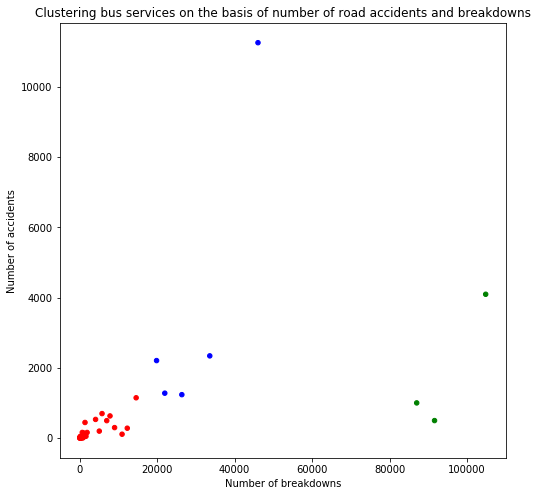

In [9]:
#poltting the obtained clusters on graph
a=np.array([x,y])
categories=np.array(color1)
colormap=np.array(['r','g','b'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.scatter(a[0], a[1], s=20, c=colormap[categories])
plt.xlabel('Number of breakdowns')
plt.ylabel('Number of accidents')
plt.title('Clustering bus services on the basis of number of road accidents and breakdowns')
plt.savefig('ScatterClassPlot.png')
plt.show()